In your TRamWAy git repository, type:
```
    git checkout meanfield
```
The plugin is available in files:
```
    tramway/inference/meanfield.py
    tramway/inference/meanfield_friction_drift.py
    tramway/inference/meanfield_friction_potential.py
    tramway/inference/meanfield_ddrift.py
    tramway/inference/meanfield_dv.py
```

In [62]:
%matplotlib inline
from tramway.helper import *
from tramway.inference import meanfield
import numpy as np
import matplotlib.pyplot as plt

In [63]:
help(meanfield.Meanfield)

Help on class Meanfield in module tramway.inference.meanfield:

class Meanfield(builtins.object)
 |  The `Meanfield` class helps manage multiple features to be spatially
 |  and/or temporally regularized.
 |  
 |  It performs the common initial calculations such as mean displacements,
 |  and implements the meanfield regularization in multiple flavours,
 |  as detailed in :met:`regularize` and :met:`neg_log_prior`.
 |  
 |  Regularization flavours can be selected for each feature individually
 |  providing derived classes with a `prior` input argument described in
 |  :met:`parse_prior`.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, cells, dt=None, _inherit=False, **kwargs)
 |      Derived classes should take a private `_inherit` input argument
 |      that should be ``False`` by default,
 |      and overwrite the `__init__` method first calling the parent class' `__init__`
 |      with ``_inherit=True``,
 |      declare additional features if any,
 |      and then run the fol

In [2]:
feature1 = 'friction'
#feature1 = 'diffusivity'
#feature2 = 'potential'
feature2 = 'drift'

analysis_tree = Analyses(load_xyt('Vsink.txt'))
label = 'grid'
tessellate(analysis_tree, 'grid', label=label, enable_time_regularization=True, time_window_duration=6, time_window_shift=3)
nsegments = 5

model_name = 'meanfield {},{}'.format(feature1, feature2)
_=infer(analysis_tree, model_name, input_label=label,
        drift_prior = dict(
            spatial_hyperparameter=1e3,
            time_hyperparameter=1e6,
            nodes_free=True, # see tramway.inference.meanfield.Meanfield.parse_prior
            cost_free=True,
            ),
        potential_prior = dict(
            spatial_hyperparameter = .1,
            time_hyperparameter = 1e3,
            ),
        sigma = .01, # not supported
        max_iter=1e3,
        #gradient_side='<>', # potential only
        verbose=True,
       )

loading: tramway.inference.meanfield_friction_potential...	[done]
loading: tramway.inference.meanfield_dv...	[done]
loading: tramway.inference.degraded_df...	[done]
loading: tramway.inference.meanfield_friction_drift2...	[done]
loading: tramway.inference.d_conj_prior...	[done]
loading: tramway.inference.bayes_factors...	[done]
loading: tramway.inference.standard_d...	[done]
loading: tramway.inference.meanfield_friction_drift...	[done]
loading: tramway.inference.gradient...	[done]
loading: tramway.inference.d...	[done]
loading: tramway.inference.stochastic_dv...	[done]
loading: tramway.inference.standard_ddrift...	[done]
loading: tramway.inference.meanfield_friction_potential2...	[failed]
Traceback (most recent call last):
  File "/home/francois/github/TRamWAy/tramway/core/plugin.py", line 48, in list_plugins
    module = importlib.import_module(path)
  File "/usr/lib/python3.6/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, le

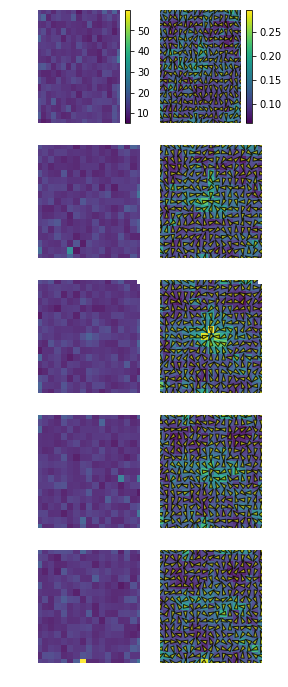

In [3]:
inches = 2.
fig, axes = plt.subplots(nsegments, 2)
fig.set_size_inches(2 * inches, inches * (nsegments + 1))

for segment in range(nsegments):
    map_plot(analysis_tree, feature=feature1, segment=segment,
             label=(label,0), title=None, colorbar=segment==0, axes=axes[segment,0], show=False)
    axes[segment,0].set_axis_off()
    map_plot(analysis_tree, feature=feature2, segment=segment, inferencemap=True, # inferencemap does not affect potential
             label=(label,0), title=None, colorbar=segment==0, axes=axes[segment,1], show=False)
    axes[segment,1].set_axis_off()

In [61]:
feature1 = 'friction'
#feature1 = 'diffusivity'
feature2 = 'potential'
#feature2 = 'drift'

analysis_tree = Analyses(load_xyt('Dsink.txt'))
label = 'grid'
tessellate(analysis_tree, 'grid', label=label, enable_time_regularization=True, time_window_duration=6, time_window_shift=3)
nsegments = 5

model_name = 'meanfield {},{}'.format(feature1, feature2)
_=infer(analysis_tree, model_name, input_label=label,
        diffusivity_prior = dict(
            spatial_hyperparameter=10,
            time_hyperparameter = 1e3,
            ),
        friction_prior = dict(
            spatial_hyperparameter=1e-6,
            time_hyperparameter=1e-3,
            ),
        potential_prior = dict(
            time_hyperparameter = 1e99,
            ),
        sigma = .01, # not supported
        max_iter=1e3,
        #gradient_side='<>', # potential only
        verbose=True,
       )

/home/francois/github/TRamWAy/tramway/inference/meanfield.py:93: RuntimeWarning: ignoring friction_prior argument
  warn('ignoring {} argument'.format(arg), RuntimeWarning)


debug: in parse_prior:	 V {'time_hyperparameter': 1e+99}
debug: in parse_prior:	 V True False True
debug: in parse_prior:	 D {'spatial_hyperparameter': 10, 'time_hyperparameter': 1000.0}
debug: in parse_prior:	 D True False True
 ** preliminary fit (no regularization): ** 
[0] max values for: ||gradV|| 3.32 aV:bV 2.29:3312.12 aD:bD 0.48:43933.16
[0] approx -logP: -50548.770760787826
[1] max values for: ||gradV|| 2.30 aV:bV 2.29:3312.39 aD:bD 0.48:26911.69
[1] approx -logP: -53964.24071721645
[2] max values for: ||gradV|| 1.56 aV:bV 2.29:3312.39 aD:bD 0.48:20493.16
[2] approx -logP: -55086.91711284722
[3] max values for: ||gradV|| 1.10 aV:bV 2.30:3312.39 aD:bD 0.48:19673.65
[3] approx -logP: -55424.19046299507
[4] max values for: ||gradV|| 1.11 aV:bV 2.30:3312.39 aD:bD 0.48:18067.41
[4] approx -logP: -55865.320080403835
[5] max values for: ||gradV|| 0.98 aV:bV 2.33:3312.39 aD:bD 0.48:19270.31
[5] approx -logP: -56082.3911588774
[6] max values for: ||gradV|| 0.89 aV:bV 2.32:3312.39 aD:bD

/home/francois/github/TRamWAy/tramway/inference/meanfield_dv.py:426: RuntimeWarning: invalid value encountered in less
  if np.any(V<0):


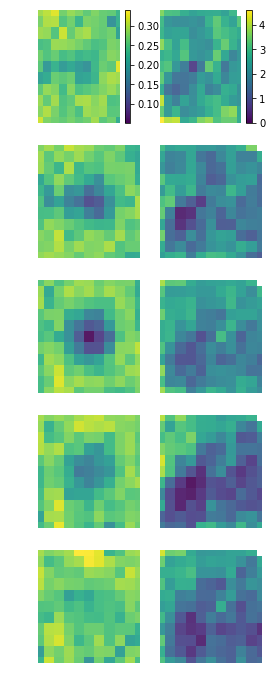

In [60]:
inches = 2.
fig, axes = plt.subplots(nsegments, 2)
fig.set_size_inches(2 * inches, inches * (nsegments + 1))

for segment in range(nsegments):
    map_plot(analysis_tree, feature=feature1, segment=segment,
             label=(label,0), title=None, colorbar=segment==0, axes=axes[segment,0], show=False)
    axes[segment,0].set_axis_off()
    map_plot(analysis_tree, feature=feature2, segment=segment, inferencemap=True, # inferencemap does not affect potential
             label=(label,0), title=None, colorbar=segment==0, axes=axes[segment,1], show=False)
    axes[segment,1].set_axis_off()